In [22]:
import tensorflow as tf
import numpy as np
tf.__path__
tf.__version__
import keras
print keras.__version__
# from keras_frcnn import resnet as nn
from keras.optimizers import Adam, SGD
from keras.layers import Input
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras_frcnn import losses
from keras.callbacks import ReduceLROnPlateau
import keras.backend as K 
sess_config = tf.ConfigProto(
        allow_soft_placement=True,
        # log_device_placement=True,
        # inter_op_parallelism_threads=8,
        # intra_op_parallelism_threads=8,
#         device_count={'GPU': 0}
        # device_count={'CPU': 0}
    )

sess_config.gpu_options.allow_growth = True
# sess_config.gpu_options.per_process_gpu_memory_fraction = 0.7

sess=tf.Session(config=sess_config)

K.set_session(sess)
import subprocess

proc = subprocess.Popen(["nvidia-smi"], stdout=subprocess.PIPE, shell=True)
(out, err) = proc.communicate()
print "program output:", out

import os
from io import BytesIO
import numpy as np
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML

import tensorflow as tf



2.0.3
program output: Tue Apr 18 19:44:51 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 367.57                 Driver Version: 367.57                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro K5200        Off  | 0000:03:00.0     Off |                  Off |
| 31%   50C    P0    26W / 150W |     64MiB /  8123MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla K20c          Off  | 0000:04:00.0     Off |                    0 |
| 40%   53C    P0    48W / 225W |     89MiB /  4742MiB |      0%      Default |
+-------------------------------+----------------------+----------

In [18]:
cfg.TEST.HAS_RPN = True  # Use RPN for proposals
print(tf.__version__)
print(tf.__path__)

# init session
sess_config = tf.ConfigProto(
    allow_soft_placement=True,
#     log_device_placement=True,
#     inter_op_parallelism_threads=8,
#     intra_op_parallelism_threads=8,
    device_count = {'GPU': 0}
    # device_count={'CPU': 0}
)

sess_config.gpu_options.allow_growth = True
# sess_config.gpu_options.per_process_gpu_memory_fraction = 0.8

sess = tf.Session(config=sess_config)
# load network
tf.reset_default_graph()
tf.reset_default_graph()
net = get_network("VGGnet_test",21)

graph=tf.get_default_graph()
graph_def=graph.as_graph_def()

1.0.1
['/usr/local/lib/python2.7/dist-packages/tensorflow']
Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_cls_score/rpn_cls_score:0", shape=(?, ?, ?, 18), dtype=float32)
Tensor("rpn_cls_prob:0", shape=(?, ?, ?, ?), dtype=float32)
Tensor("rpn_cls_prob_reshape:0", shape=(?, ?, ?, 18), dtype=float32)
Tensor("rpn_bbox_pred/rpn_bbox_pred:0", shape=(?, ?, ?, 36), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rois:0", shape=(?, 5), dtype=float32)
[<tf.Tensor 'conv5_3/conv5_3:0' shape=(?, ?, ?, 512) dtype=float32>, <tf.Tensor 'rois:0' shape=(?, 5) dtype=float32>]
Tensor("fc7/fc7:0", shape=(?, 4096), dtype=float32)


In [21]:

layers = [op.name for op in graph.get_operations() if op.type=='Conv2D' and 'import/' in op.name]
feature_nums = [int(graph.get_tensor_by_name(name+':0').get_shape()[-1]) for name in layers]

print('Number of layers', len(layers))
print('Total number of feature channels:', sum(feature_nums))


# Helper functions for TF Graph visualization

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = tf.compat.as_bytes("<stripped %d bytes>"%size)
    return strip_def
  
def rename_nodes(graph_def, rename_func):
    res_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = res_def.node.add() 
        n.MergeFrom(n0)
        n.name = rename_func(n.name)
        for i, s in enumerate(n.input):
            n.input[i] = rename_func(s) if s[0]!='^' else '^'+rename_func(s[1:])
    return res_def
  
def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
  
    iframe = """
        <iframe seamless style="width:800px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# Visualizing the network graph. Be sure expand the "mixed" nodes to see their 
# internal structure. We are going to visualize "Conv2D" nodes.
tmp_def = rename_nodes(graph_def, lambda s:"/".join(s.split('_',1)))
# show_graph(tmp_def)

('Number of layers', 0)
('Total number of feature channels:', 0)


1.0.1
['/usr/local/lib/python2.7/dist-packages/tensorflow']
Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_cls_score/rpn_cls_score:0", shape=(?, ?, ?, 18), dtype=float32)
Tensor("rpn_cls_prob:0", shape=(?, ?, ?, ?), dtype=float32)
Tensor("rpn_cls_prob_reshape:0", shape=(?, ?, ?, 18), dtype=float32)
Tensor("rpn_bbox_pred/rpn_bbox_pred:0", shape=(?, ?, ?, 36), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rois:0", shape=(?, 5), dtype=float32)
[<tf.Tensor 'conv5_3/conv5_3:0' shape=(?, ?, ?, 512) dtype=float32>, <tf.Tensor 'rois:0' shape=(?, 5) dtype=float32>]
Tensor("fc7/fc7:0", shape=(?, 4096), dtype=float32)





Loaded network output/faster_rcnn_end2end/train/VGGnet_fast_rcnn_iter_70000.ckpt
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
De

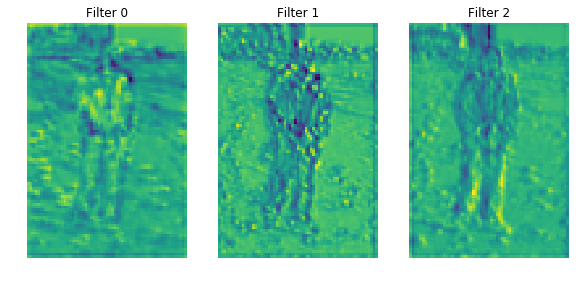

conv4_2/Conv2D
conv4_3/Conv2D
conv5_1/Conv2D
conv5_2/Conv2D
conv5_3/Conv2D
rpn_conv/3x3/Conv2D
rpn_cls_score/Conv2D
rpn_bbox_pred/Conv2D
crop_000002.png

(1, 144, 98, 64)
(1, 144, 98, 64)
(1, 72, 49, 128)
(1, 72, 49, 128)
(1, 36, 24, 256)
(1, 36, 24, 256)
(1, 36, 24, 256)
(1, 18, 12, 512)
(1, 18, 12, 512)
(1, 18, 12, 512)
(1, 9, 6, 512)
(1, 9, 6, 512)
(1, 9, 6, 512)
(1, 9, 6, 512)
(1, 9, 6, 18)
(1, 9, 6, 36)
conv1_1/Conv2D
conv1_2/Conv2D
conv2_1/Conv2D
conv2_2/Conv2D
conv3_1/Conv2D
conv3_2/Conv2D
conv3_3/Conv2D
conv4_1/Conv2D
conv4_2/Conv2D
conv4_3/Conv2D
conv5_1/Conv2D
conv5_2/Conv2D
conv5_3/Conv2D
rpn_conv/3x3/Conv2D
rpn_cls_score/Conv2D
rpn_bbox_pred/Conv2D


In [25]:
tf.reset_default_graph()
%matplotlib inline
%run tools/demo.py --dbg